# Building Chemical Reaction Networks (CRNs) Directly with BioCRNpyler

**Overview:**  This tutorial shows how to use [BioCRNpyler](https://github.com/BuildACell/BioCRNPyler) to represent simple CRNs

## What is a CRN?
A CRN is a widely established model of chemistry and biochemistry.
* A set of species $S$
* A set of reactions $R$ interconvert species $I_r$ to $O_r$

\begin{align}
\\
I \xrightarrow[]{\rho(s)} O
\\
\end{align}

 * $I$ and $O$ are multisets of species $S$. 
 * $\rho(s): S \to \mathbb{R}$ is a function that determines how fast the reaction occurs.


In [ ]:
#Import everything from biocrnpyler
!pip install biocrnpyler[all]
!pip install pandas
from biocrnpyler import *

     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 6.2MB 8.0MB/s 


## Creating Species:
Species are one of the central Objects used by BioCRNpyler. They represent the species of a CRN. Species are specified by their name (required) material_type (optional) , and attributes (optional) and can be displayed as strings. The combination of name, material type, and attributes uniquely identify each Species.

In [ ]:
A = Species("A", material_type = "m1", attributes = ["attribute1", "attribute2"])
print(A)

m1_A_attribute1_attribute2


A two species with the same name but different material types or attributes are different!

In [ ]:
A2 = Species("A") #material_type and name are optional
print(A2)
print(A == A2)

A
False


# Creating Complexes of Species
Complexes are a subclass of Species useful for representing sets of two or more species that have bound together. Besides keeping track of their internal Species, Complexes behave equivalently to Species.

In [ ]:
A = Species("A")
B = Species("B")

#Order does not matter for Complexes by default
C1 = Complex([A, B])
print("Complex([A, B]):", C1)

C2 = Complex([B, A])
print("Complex([B, A]):", C2)

print("C1 == C2?", C1 == C2)

Complex([A, B]): complex_A_B_
Complex([B, A]): complex_A_B_
C1 == C2? True


# You can also make Ordered Complexes
These are like Complexes, but the order matters.

In [ ]:
#To make order matter, simply call the Complex function with order = True
OC1 = Complex([A, B], ordered = True)
print("Complex([A, B]):", OC1)

OC2 = Complex([B, A], ordered = True)
print("Complex([B, A]):", OC2)

print("C1 == C2?", OC1 == OC2)

Complex([A, B]): ordered_complex_A_B_
Complex([B, A]): ordered_complex_B_A_
C1 == C2? False


# Creating Massaction Reactions
Use the Reaction.from_massaction(Input_Species, Output_Species, k_forward) command to create a reaction.

In [ ]:
#Create a reaction to 2A --> B
R1 = Reaction.from_massaction([A, A], [B], k_forward = 1.0)

#You can print a reaction in two ways
print(R1) #Prints a simple representation of the reaction
print(R1.pretty_print()) #Prints a much more detailed representation of the reaction

2A --> B
2A --> B
 Kf=k_forward * A^2
  k_forward=1.0



# Creating Reversible Massaction Reactions

Use the Reaction.from_massaction(Input_Species, Output_Species, k_forward, k_reverse) command to create a reaction.

In [ ]:
#Create a reversible reaction to represent binding and unbinding of A and B to form C1
R2 = Reaction.from_massaction([A, B], [C1], k_forward = 10.0, k_reverse = 2.0)

#You can print a reaction in two ways
print(R2) #Prints a simple representation of the reaction
print(R2.pretty_print()) #Prints a much more detailed representation of the reaction

A+B <--> complex[A:B]
A+B <--> complex[A:B]
 Kf=k_forward * A * B
 Kr=k_reverse * complex_A_B_
  k_forward=10.0
  k_reverse=2.0



# Creating a Chemical Reaction Network
Use ChemicalReactionNetwork(species, reactions) which takes a list of Species and list of Reactions as inputs.

In [ ]:
CRN = ChemicalReactionNetwork(species = [A, B, C1], reactions = [R1, R2])

#print the CRN - you can toggle if you want to see there rates
print(CRN.pretty_print(show_rates = True))

Species (3) = {0. A init_conc = 0, 1. B init_conc = 0, 2. complex[A:B] init_conc = 0}

Reactions (2) = [
0. 2A --> B
 Kf=k_forward * A^2
  k_forward=1.0

1. A+B <--> complex[A:B]
 Kf=k_forward * A * B
 Kr=k_reverse * complex_A_B_
  k_forward=10.0
  k_reverse=2.0

]


## CRNs can be saved as SBML and simulated

To save a CRN as SBML:

    CRN.write_sbml_file("file_name.xml")

To simulate a CRN with biosrape:

    Results, Model = CRN_expression.simulate_with_bioscrape(timepoints, initial_condition_dict = x0)

Where x0 is a dictionary: x0 = {str(species_name):initial_value}

# To run simulations, install Bioscrape simulator

In [ ]:
# Install emcee
!pip install emcee
 
# Install bioscrape
!git clone https://github.com/biocircuits/bioscrape.git
!(cd bioscrape; python setup.py install)
 
# Make sure it worked
import bioscrape

     |████████████████████████████████| 51kB 1.6MB/s 
Cloning into 'bioscrape'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 1648 (delta 17), reused 16 (delta 6), pack-reused 1608
Receiving objects: 100% (1648/1648), 132.29 MiB | 23.25 MiB/s, done.
Resolving deltas: 100% (1041/1041), done.
Installing Bioscrape
Compiling bioscrape/random.pyx because it changed.
Compiling bioscrape/types.pyx because it changed.
Compiling bioscrape/simulator.pyx because it changed.
Compiling bioscrape/inference.pyx because it changed.
[1/4] Cythonizing bioscrape/inference.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/bioscrape/bioscrape/inference.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/4] Cythonizing bioscrape/random.pyx
/usr/l

{'A': 10}
[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444

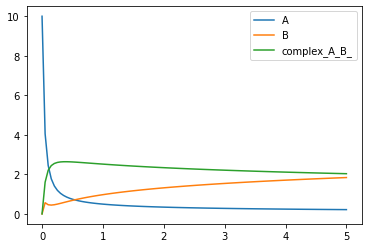

In [ ]:
%matplotlib inline

#Saving and simulating a CRN
CRN.write_sbml_file("crn1.xml")

#Simulating a CRN with Bioscrape
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(A):10}
    timepoints = np.linspace(0, 5, 100)#Timepoints to simulate over
    print(x0)  
    print(timepoints)
    #This function can also take a filename keyword to save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    plt.plot(R['time'], R[str(A)], label = str(A))
    plt.plot(R['time'], R[str(B)], label = str(B))
    plt.plot(R['time'], R[str(C1)], label = str(C1))
    plt.legend()
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

# Non-massaction propensities in BioCRNpyler
By default, BioCRNpyler assumes that propensities are massaction with only one parameter, the rate constant $k$. However, additional propensity types are also supported. These reactions are created in two steps: first a Propensity of the appropriate type is made, then Reaction is made using that Propensity. Examples are shown below:

## HillPositive: $\rho(s) = k \frac{(\frac{s}{K})^n}{1+(\frac{s}{K})^n}$
Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1".

In [ ]:
#create the propensity
R = Species("Regulator")
hill_pos  = HillPositive(k=1, s1=R, K=5, n=2)

#create the reaction
r_hill_pos = Reaction([A], [B], propensity_type = hill_pos)

#print the reaction
print(r_hill_pos.pretty_print())

A --> B
 Kf = k (Regulator/K)^n / (1+(Regulator/K)^n)
  k=1
  K=5
  n=2



## HillNegative: $\rho(s) = k \frac{1}{1+(\frac{s}{K})^n}$
Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1".

In [ ]:
#create the propensity
R = Species("Regulator")
hill_neg  = HillPositive(k=1, s1=R, K=5, n=2)

#create the reaction
r_hill_neg = Reaction([A], [B], propensity_type = hill_neg)

#print the reaction
print(r_hill_neg.pretty_print())

A --> B
 Kf = k (Regulator/K)^n / (1+(Regulator/K)^n)
  k=1
  K=5
  n=2



## ProportionalHillPositive: $\rho(s, d) = k d \frac{(\frac{s}{K})^n}{1+(\frac{s}{K})^n}$
Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1", proportional species "d"

In [ ]:
#create the propensity
R = Species("Regulator")
D = Species("D")
prop_hill_pos  = ProportionalHillPositive(k=1, s1=R, K=5, n=2, d = D)

#create the reaction
r_prop_hill_pos = Reaction([A], [B], propensity_type = prop_hill_pos)

#print the reaction
print(r_prop_hill_pos.pretty_print())

A --> B
 Kf = k D Regulator^n/(1+(Regulator/K)^n)
  k=1
  K=5
  n=2



## ProportionalHillNegative: $\rho(s) = k \frac{1}{1+(\frac{s}{K})^n}$
Requried parameters: rate constant "k", offset "K", hill coefficient "n", hill species "s1", proportional species "d"

In [ ]:
#create the propensity
R = Species("Regulator")
D = Species("D")
prop_hill_neg  = ProportionalHillNegative(k=1, s1=R, K=5, n=2, d = D)

#create the reaction
r_prop_hill_neg = Reaction([A], [B], propensity_type = prop_hill_neg)

#print the reaction
print(r_prop_hill_neg.pretty_print())

A --> B
 Kf = k D / ( 1 + (Regulator/K)^2 )
  k=1
  K=5
  n=2



# Excercise 1:
### A. Create a CRN to simulate the following enzymatic reaction using massaction propensities: $A + C \leftrightarrow A:C \rightarrow C + B$
(Note the first reaction is reversible and you can choose any rates $k_b$ and $k_u$. The second reaction isnt reversible and occurs at rate $k_{cat}$)
### B. Create a different CRN to simulate the following enzymatic reaction using a ProportionalHillPositive Propensity: $A \rightarrow B \quad \rho = k_{cat} C \frac{\frac{A}{K}}{1+\frac{A}{K}}$ where $K = \frac{k_u}{k_b}$
### C. for what rates $k_u$, $k_b$, and $k_{cat}$ do the two models agree and disagree?

In [ ]:
# A
A = Species("A")
B = Species("B")
C = Species("C")

AC = Complex([A, C])
print("Complex([A, C]):", AC)
k_b=100
k_u=3.0
k_cat=1.0
R1 = Reaction.from_massaction([A, C], [AC], k_forward = k_b, k_reverse=k_u)
R2 = Reaction.from_massaction([AC], [C, B], k_forward=k_cat)



Complex([A, C]): complex_A_C_


In [ ]:
CRN = ChemicalReactionNetwork(species = [A, B, C, AC], reactions = [R1, R2])

#print the CRN - you can toggle if you want to see there rates
print(CRN.pretty_print(show_rates = True))

Species (4) = {0. A init_conc = 0, 1. B init_conc = 0, 2. C init_conc = 0, 3. complex[A:C] init_conc = 0}

Reactions (2) = [
0. A+C <--> complex[A:C]
 Kf=k_forward * A * C
 Kr=k_reverse * complex_A_C_
  k_forward=100
  k_reverse=3.0

1. complex[A:C] --> C+B
 Kf=k_forward * complex_A_C_
  k_forward=1.0

]


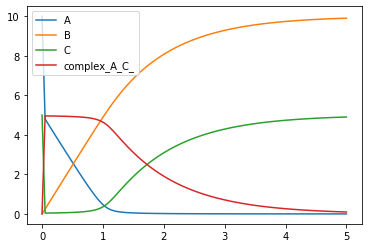

In [ ]:
CRN.write_sbml_file("exercise1.xml")
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(A):10, str(C):5}

    timepoints = np.linspace(0, 5, 100)#Timepoints to simulate over
    
    #This function can also take a filename keyword to save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    plt.plot(R['time'], R[str(A)], label = str(A))
    plt.plot(R['time'], R[str(B)], label = str(B))
    plt.plot(R['time'], R[str(C)], label = str(C))
    plt.plot(R['time'], R[str(AC)], label = str(AC))
    plt.legend()
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

In [ ]:
#create the propensity
prop_hill_pos  = ProportionalHillPositive(k=k_cat, s1=A, K=k_u/k_b, n=1, d = C)

#create the reaction
r_prop_hill_pos = Reaction([A], [B], propensity_type = prop_hill_pos)

#print the reaction
print(r_prop_hill_pos.pretty_print())
print(prop_hill_pos)

A --> B
 Kf = k C A^n/(1+(A/K)^n)
  k=1.0
  K=0.03
  n=1



In [ ]:
CRN = ChemicalReactionNetwork(species = [A, B, C], reactions = [r_prop_hill_pos])

#print the CRN - you can toggle if you want to see there rates
print(CRN.pretty_print(show_rates = True))

Species (3) = {0. A init_conc = 0, 1. B init_conc = 0, 2. C init_conc = 0}

Reactions (1) = [
0. A --> B
 Kf = k C A^n/(1+(A/K)^n)
  k=1.0
  K=0.03
  n=1

]


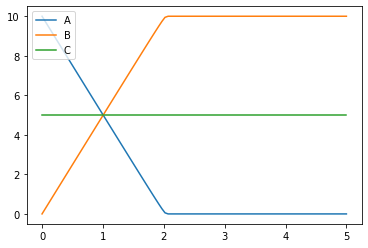

In [ ]:
CRN.write_sbml_file("exercise1b.xml")
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(A):10, str(C):5}

    timepoints = np.linspace(0, 5, 100)#Timepoints to simulate over
    
    #This function can also take a filename keyword to save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    plt.plot(R['time'], R[str(A)], label = str(A))
    plt.plot(R['time'], R[str(B)], label = str(B))
    plt.plot(R['time'], R[str(C)], label = str(C))
    plt.legend()
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

# Excercise 2:
### A. Create a CRN to simulate the following model of transcriptional repression: $G + nR \leftrightarrow G:nR \quad G \rightarrow G + T$

(Note the first reaction is reversible binding of $n$ repressors $R$ to a promoter $G$. You can choose any rates $k_b$ and $k_u$ and any integer value of $n$. The second models transcription of $T$ from $G$ and occurs at rate $k_{tx}$.
### B. Create a different CRN to simulate the following transcriptional repression reaction using a ProportionalHillNegative Propensity: $G \rightarrow G + T \quad \rho = k_{tx} G \frac{1}{1 + (\frac{R}{K})^n}$ where $K = \frac{k_u}{k_b}$. 
### C. for what rates $k_u$, $k_b$, and $k_{tx}$ do the two models agree and disagree?

In [ ]:
G = Species("G")
n= Species("n")
nR = Species("nR")
T = Species("T")

GnR = Complex([G, nR])
print("Complex([G, nR]):", GnR)
k_b1=0.5
k_u1=1.0
k_tx=1.0
R1 = Reaction.from_massaction([G, nR], [GnR], k_forward = k_b1, k_reverse=k_u1)
R2 = Reaction.from_massaction([G,n], [G, T], k_forward=k_tx)

Complex([G, nR]): complex_G_nR_


In [ ]:
CRN = ChemicalReactionNetwork(species = [G, nR, n, GnR, T], reactions = [R1, R2])

#print the CRN - you can toggle if you want to see there rates
print(CRN.pretty_print(show_rates = True))

Species (5) = {0. G init_conc = 0, 1. nR init_conc = 0, 2. n init_conc = 0, 3. complex[G:nR] init_conc = 0, 4. T init_conc = 0}

Reactions (2) = [
0. G+nR <--> complex[G:nR]
 Kf=k_forward * G * nR
 Kr=k_reverse * complex_G_nR_
  k_forward=1.0
  k_reverse=3.0

1. G+n --> G+T
 Kf=k_forward * G * n
  k_forward=2.0

]


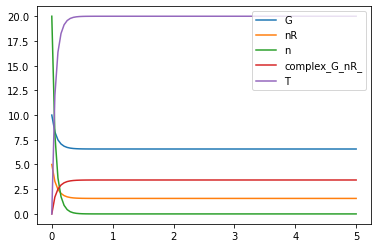

In [ ]:
CRN.write_sbml_file("exercise2.xml")
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(G):10, str(nR):5, str(n):20}

    timepoints = np.linspace(0, 5, 100)#Timepoints to simulate over
    
    #This function can also take a filename keyword to save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    plt.plot(R['time'], R[str(G)], label = str(G))
    plt.plot(R['time'], R[str(nR)], label = str(nR))
    plt.plot(R['time'], R[str(n)], label = str(n))
    plt.plot(R['time'], R[str(GnR)], label = str(GnR))
    plt.plot(R['time'], R[str(T)], label = str(T))
    plt.legend()
    #plt.yscale('log')
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

G --> G+T
 Kf = k G / ( 1 + (Repressor/K)^2 )
  k=1.0
  K=2.0
  n=2



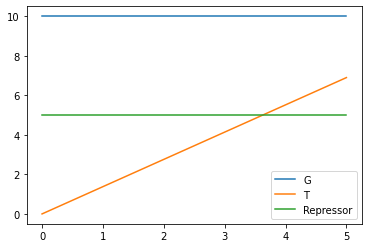

In [ ]:
G = Species("G")
T = Species("T")
Re = Species("Repressor")

k_b1=0.5
k_u1=1.0
k_tx=1.0
K2=k_u1/k_b1

prop_hill_negGT  = ProportionalHillNegative(k=k_tx, s1=Re, K=K2, n=2, d = G)

#create the reaction
r_prop_hill_negGT = Reaction([G], [G, T], propensity_type = prop_hill_negGT)

#print the reaction
print(r_prop_hill_negGT.pretty_print())

CRN = ChemicalReactionNetwork(species = [G,T,Re], reactions = [r_prop_hill_negGT])

CRN.write_sbml_file("exercise2hill.xml")
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(G):10, str(Re):5}

    timepoints = np.linspace(0, 5, 100)#Timepoints to simulate over
    
    #This function can also take a filename keyword to save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    plt.plot(R['time'], R[str(G)], label = str(G))
    plt.plot(R['time'], R[str(T)], label = str(T))
    plt.plot(R['time'], R[str(Re)], label = str(Re))
    plt.legend()
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

Gene R_dna that is being transcribed into mRNA R_rna and translated into protein R_p. R_p is a repressor that weakly targets the promoter of gene R_p. Gene G_dna that is being expressed as fluorescent G_p which matures with rate 4 [1/s]. R_p targets the promoter of gene G_dna. 
--> How the production rate is changed with the binding affinity of Rp and G_dna. 
Unbound and bound R protein degrades at a constant rate of 1. What are the differences in production when we change the promoter of the R_dna gene so that R_p repressor cannot bind to the promotor?

In [ ]:
R_dna = Species("R_dna")
R_rna= Species("R_rna")
R_p = Species("R_p")
G_dna = Species("G_dna")
G_p = Species("G_p")

#simulating through mass action, so model repression as forming complex with the D
RdRp = Complex([R_dna, R_p])
print("Complex([R_dna, R_p]):", RdRp)
GdRp = Complex([G_dna, R_p])
print("Complex([G_dna, R_p]):", GdRp)
k_weakrep=1.0
k_weakreprev=3.0
k_strongrep=10.0
k_strongreprev=2.0
k_Rrnagen=2.0
k_Rpgen=2.0
k_Gpgen=4.0
k_Rpdeg=1.0
R1 = Reaction.from_massaction([R_dna, R_p], [RdRp], k_forward = k_weakrep, k_reverse=k_weakreprev)
R2 = Reaction.from_massaction([G_dna, R_p], [GdRp], k_forward = k_strongrep, k_reverse=k_strongreprev)
R3 = Reaction.from_massaction([R_dna], [R_dna, R_rna], k_forward=k_Rrnagen)
R4 = Reaction.from_massaction([R_rna], [R_rna, R_p], k_forward=k_Rpgen)
R5 = Reaction.from_massaction([G_dna], [G_dna, G_p], k_forward=k_Gpgen)
R6 = Reaction.from_massaction([R_p, R_p], [R_p], k_forward=k_Rpdeg)

CRN = ChemicalReactionNetwork(species = [R_dna, R_rna, R_p, RdRp, G_dna, G_p, GdRp], reactions = [ R2, R3, R4, R5, R6])

#print the CRN - you can toggle if you want to see there rates
print(CRN.pretty_print(show_rates = True))

Complex([R_dna, R_p]): complex_R_dna_R_p_
Complex([G_dna, R_p]): complex_G_dna_R_p_
Species (7) = {0. R_dna init_conc = 0, 1. R_rna init_conc = 0, 2. R_p init_conc = 0, 3. complex[R_dna:R_p] init_conc = 0, 4. G_dna init_conc = 0, 5. G_p init_conc = 0, 6. complex[G_dna:R_p] init_conc = 0}

Reactions (5) = [
0. G_dna+R_p <--> complex[G_dna:R_p]
 Kf=k_forward * G_dna * R_p
 Kr=k_reverse * complex_G_dna_R_p_
  k_forward=10.0
  k_reverse=2.0

1. R_dna --> R_dna+R_rna
 Kf=k_forward * R_dna
  k_forward=2.0

2. R_rna --> R_rna+R_p
 Kf=k_forward * R_rna
  k_forward=2.0

3. G_dna --> G_dna+G_p
 Kf=k_forward * G_dna
  k_forward=4.0

4. 2R_p --> R_p
 Kf=k_forward * R_p^2
  k_forward=1.0

]


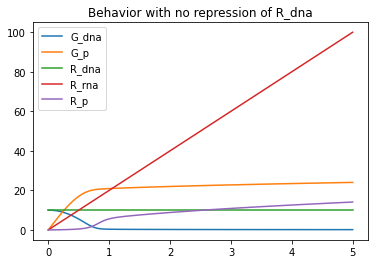

In [ ]:
CRN.write_sbml_file("repression20_10_15.xml")
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(G_dna):10, str(R_dna):10}

    timepoints = np.linspace(0, 5, 100)#Timepoints to simulate over
    
    #This function can also take a filename keyword to save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    plt.plot(R['time'], R[str(G_dna)], label = str(G_dna))
    plt.plot(R['time'], R[str(G_p)], label = str(G_p))
    plt.plot(R['time'], R[str(R_dna)], label = str(R_dna))
    plt.plot(R['time'], R[str(R_rna)], label = str(R_rna))
    plt.plot(R['time'], R[str(R_p)], label = str(R_p))
    plt.legend()
    plt.title("Behavior with no repression of R_dna")
    #plt.yscale('log')
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

In [ ]:
#create the propensity
#k_Rrnagen1=k_Rrnagen*20
#k_Gpgen1=k_Gpgen*20
hill_neg_R  = ProportionalHillNegative(k=k_Rrnagen1, s1=R_p, K=k_weakrep/k_weakreprev, n=2, d=R_dna)
hill_neg_G  = ProportionalHillNegative(k=k_Gpgen, s1=R_p, K=k_strongrep/k_strongreprev, n=2, d=G_dna)

#create the reaction
r_hill_neg_R = Reaction([R_dna], [R_dna, R_rna], propensity_type = hill_neg_R)
r_hill_neg_G = Reaction([G_dna], [G_dna, G_p], propensity_type = hill_neg_G)

#print the reaction
#print(r_hill_neg_R.pretty_print())
#print(r_hill_neg_G.pretty_print())

CRN = ChemicalReactionNetwork(species = [R_dna, R_rna, R_p, RdRp, G_dna, G_p, GdRp], reactions = [r_hill_neg_R , r_hill_neg_G , R3, R4, R5, R6])

#print the CRN - you can toggle if you want to see there rates
print(CRN.pretty_print(show_rates = True))

Species (7) = {0. R_dna init_conc = 0, 1. R_rna init_conc = 0, 2. R_p init_conc = 0, 3. complex[R_dna:R_p] init_conc = 0, 4. G_dna init_conc = 0, 5. G_p init_conc = 0, 6. complex[G_dna:R_p] init_conc = 0}

Reactions (6) = [
0. R_dna --> R_dna+R_rna
 Kf = k R_dna / ( 1 + (R_p/K)^2 )
  k=40.0
  K=0.3333333333333333
  n=2

1. G_dna --> G_dna+G_p
 Kf = k G_dna / ( 1 + (R_p/K)^2 )
  k=4.0
  K=5.0
  n=2

2. R_dna --> R_dna+R_rna
 Kf=k_forward * R_dna
  k_forward=2.0

3. R_rna --> R_rna+R_p
 Kf=k_forward * R_rna
  k_forward=2.0

4. G_dna --> G_dna+G_p
 Kf=k_forward * G_dna
  k_forward=4.0

5. 2R_p --> R_p
 Kf=k_forward * R_p^2
  k_forward=1.0

]


In [ ]:
CRN = ChemicalReactionNetwork(species = [R_dna, R_rna, R_p, RdRp, G_dna, G_p, GdRp], reactions = [ r_hill_neg_G , R3, R4, R5, R6])

#print the CRN - you can toggle if you want to see there rates
print(CRN.pretty_print(show_rates = True))

Species (7) = {0. R_dna init_conc = 0, 1. R_rna init_conc = 0, 2. R_p init_conc = 0, 3. complex[R_dna:R_p] init_conc = 0, 4. G_dna init_conc = 0, 5. G_p init_conc = 0, 6. complex[G_dna:R_p] init_conc = 0}

Reactions (5) = [
0. G_dna --> G_dna+G_p
 Kf = k G_dna / ( 1 + (R_p/K)^2 )
  k=4.0
  K=5.0
  n=2

1. R_dna --> R_dna+R_rna
 Kf=k_forward * R_dna
  k_forward=2.0

2. R_rna --> R_rna+R_p
 Kf=k_forward * R_rna
  k_forward=2.0

3. G_dna --> G_dna+G_p
 Kf=k_forward * G_dna
  k_forward=4.0

4. 2R_p --> R_p
 Kf=k_forward * R_p^2
  k_forward=1.0

]


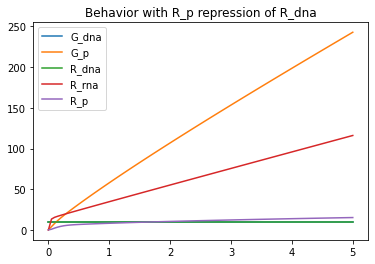

In [ ]:
CRN.write_sbml_file("repression_hill20_10_15.xml")
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    
    #Initial conditions can be set with a dictionary:
    x0 = {str(G_dna):10, str(R_dna):10}

    timepoints = np.linspace(0, 5, 100)#Timepoints to simulate over
    
    #This function can also take a filename keyword to save the file at the same time
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints = timepoints, initial_condition_dict = x0)

    #Check to ensure simulation worked
    #Results are in a Pandas Dictionary and can be accessed via string-names of species
    plt.plot(R['time'], R[str(G_dna)], label = str(G_dna))
    plt.plot(R['time'], R[str(G_p)], label = str(G_p))
    plt.plot(R['time'], R[str(R_dna)], label = str(R_dna))
    plt.plot(R['time'], R[str(R_rna)], label = str(R_rna))
    plt.plot(R['time'], R[str(R_p)], label = str(R_p))
    plt.legend()
    plt.title("Behavior with R_p repression of R_dna")
    #plt.yscale('log')
except ModuleNotFoundError:
    print("Plotting Modules not installed.")

## Advanced Exercise:
### A. Convert the massaction activatable transcription factor model (given below) into a smaller model using Hill functions and/or general propensities. 
### B. What is the fewest number of species you can find that still matches the dynamics of the original CRN? 
### C. What constraints on initial conditions and rates are there?

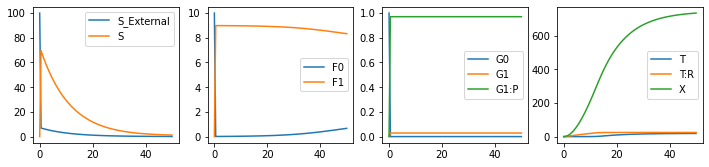

In [ ]:
#Create all the species in the model
S_ext = Species("S", attributes = ["External"], initial_concentration = 100)
S = Species("S")
F0 = Species("F0", initial_concentration = 10)
F1 = Complex([F0, S, S])
G0 = Species("X", material_type = "dna", initial_concentration = 1)
G1 = Complex([F1, G0])
P = Species("Polymerase", material_type = "protein", initial_concentration = 5)
G_tx = Complex([G1, P])
T = Species("X", material_type = "rna")
R = Species("Ribosome", initial_concentration = 25)
T_tl = Complex([T, R])
X = Species("X", material_type = "protein")

#Rates
ku = 10 #unbinding
kb = 100 #binding
ktx = 2.0 #transcription
ktl = 3.0 #translation
kdil = .1 #dilution

#Create Reactions
r1 = Reaction.from_massaction([S_ext], [S], k_forward = kb, k_reverse = ku)
r2 = Reaction.from_massaction(2*[S]+[F0], [F1], k_forward = kb, k_reverse = ku)
r3 = Reaction.from_massaction([F1, G0], [G1], k_forward = kb, k_reverse = ku)
r4 = Reaction.from_massaction([G1, P], [G_tx], k_forward = kb, k_reverse = ku)
r5 = Reaction.from_massaction([G_tx], [G1, P, T], k_forward = ktx)
r6 = Reaction.from_massaction([T, R], [T_tl], k_forward = kb, k_reverse = ku)
r7 = Reaction.from_massaction([T_tl], [T, R, X], k_forward = ktl)
r8 = Reaction.from_massaction([S], [], k_forward = kdil)
r9 = Reaction.from_massaction([T], [], k_forward = kdil)
r10 = Reaction.from_massaction([X], [], k_forward = kdil)

#Create CRN
CRN = ChemicalReactionNetwork(species = [S_ext, S, F0, F1, G0, P, G_tx, T, R, T_tl, X], reactions = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10])

timepoints = np.linspace(0, 50, 100)
R = CRN.simulate_with_bioscrape_via_sbml(timepoints)

#plot
plt.figure(figsize = (12, 2.5))
plt.subplot(141)
plt.plot(timepoints, R[str(S_ext)], label = str(S_ext))
plt.plot(timepoints, R[str(S)], label = str(S))
plt.legend()

plt.subplot(142)
plt.plot(timepoints, R[str(F0)], label = "F0")
plt.plot(timepoints, R[str(F1)], label = "F1")
plt.legend()

plt.subplot(143)
plt.plot(timepoints, R[str(G0)], label = "G0")
plt.plot(timepoints, R[str(G1)], label = "G1")
plt.plot(timepoints, R[str(G_tx)], label = "G1:P")
plt.legend()

plt.subplot(144)
plt.plot(timepoints, R[str(T)], label = "T")
plt.plot(timepoints, R[str(T_tl)], label = "T:R")
plt.plot(timepoints, R[str(X)], label = "X")
plt.legend()